# Exploratory Data Analysis on the AirBnB data


### Importing of Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


from sklearn.utils import resample

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Extracting the response 

In [2]:
ratings = pd.DataFrame(air_data["review_scores_rating"])
ratings.shape

(4238, 1)

In [3]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

In [4]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [5]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')
#air_data = air_data.select_dtypes(exclude=['object'])
#air_data.info()

C:\Users\junwe\AppData\Local\Temp/ipykernel_14196/174682891.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [6]:
#f = plt.figure(figsize=(24, 24))
#sb.heatmap(air_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## All unique amenities in the top 100 rated AirBnB


In [7]:
top_air = air_data.sort_values(by=['review_scores_rating'])
top_air = top_air[0:100]
top_air.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2864,40597192,https://www.airbnb.com/rooms/40597192,20210629180711,2021-06-30,Family Suite at Outram Park near Chinatown,"Our apartment is modern, comfortable and spaci...",The studio service apartments are only a few m...,https://a0.muscache.com/pictures/miso/Hosting-...,101145755,https://www.airbnb.com/users/show/101145755,...,NaN,NaN,NaN,NaN,f,56,50,6,0,0.05
2932,40873825,https://www.airbnb.com/rooms/40873825,20210629180711,2021-06-30,🌹全新3种独立式公寓🌹STUDIO 4 U🌹safe🎉clean🎉GRAB NOW🎉,NaN,NaN,https://a0.muscache.com/pictures/df55f063-0830...,14818409,https://www.airbnb.com/users/show/14818409,...,NaN,NaN,NaN,NaN,t,16,0,16,0,0.05
2095,32604498,https://www.airbnb.com/rooms/32604498,20210629180711,2021-06-30,Common Room for rent,6 bus stop to Angmokio MRT station (10 minutes...,NaN,https://a0.muscache.com/pictures/f9e9b5f9-8f99...,204895182,https://www.airbnb.com/users/show/204895182,...,NaN,NaN,NaN,NaN,t,1,0,0,1,0.04
825,16054752,https://www.airbnb.com/rooms/16054752,20210629180711,2021-06-30,Common Bed Room Next to NTU,Nearest residence to Nanyang Technological Uni...,NaN,https://a0.muscache.com/pictures/223258f5-52ae...,104193036,https://www.airbnb.com/users/show/104193036,...,NaN,NaN,NaN,NaN,f,2,0,2,0,0.02
1220,21214988,https://www.airbnb.com/rooms/21214988,20210629180711,2021-06-30,Luxury place,New renovated <br />High tech decor <br />Wind...,NaN,https://a0.muscache.com/pictures/9332d3ed-3c39...,149095282,https://www.airbnb.com/users/show/149095282,...,NaN,NaN,NaN,NaN,t,2,0,2,0,0.05


In [8]:
top_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2864 to 3544
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            100 non-null    int64  
 1   listing_url                                   100 non-null    object 
 2   scrape_id                                     100 non-null    int64  
 3   last_scraped                                  100 non-null    object 
 4   name                                          100 non-null    object 
 5   description                                   92 non-null     object 
 6   neighborhood_overview                         47 non-null     object 
 7   picture_url                                   100 non-null    object 
 8   host_id                                       100 non-null    int64  
 9   host_url                                      100 non-null   

In [9]:
top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["amenities"] =top_air["amenities"].to_frame()
top_air["amenities"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_14196/3206109549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


2864    Elevator, Wifi, Host greets you, Dishes and si...
2932    Elevator, Wifi, Cable TV, Carbon monoxide alar...
2095    Air conditioning, Kitchen, Hangers, Elevator, ...
825     Air conditioning, Kitchen, Hangers, Elevator, ...
1220    Air conditioning, Kitchen, Hangers, Elevator, ...
Name: amenities, dtype: object

In [10]:
top_amenities =  pd.DataFrame(''.join(top_air["amenities"]).lower().split(',')).value_counts()
top_amenities = top_air['amenities'].str.split(', ', expand=True).stack().value_counts()
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

<AxesSubplot:xlabel='count', ylabel='amenities'>

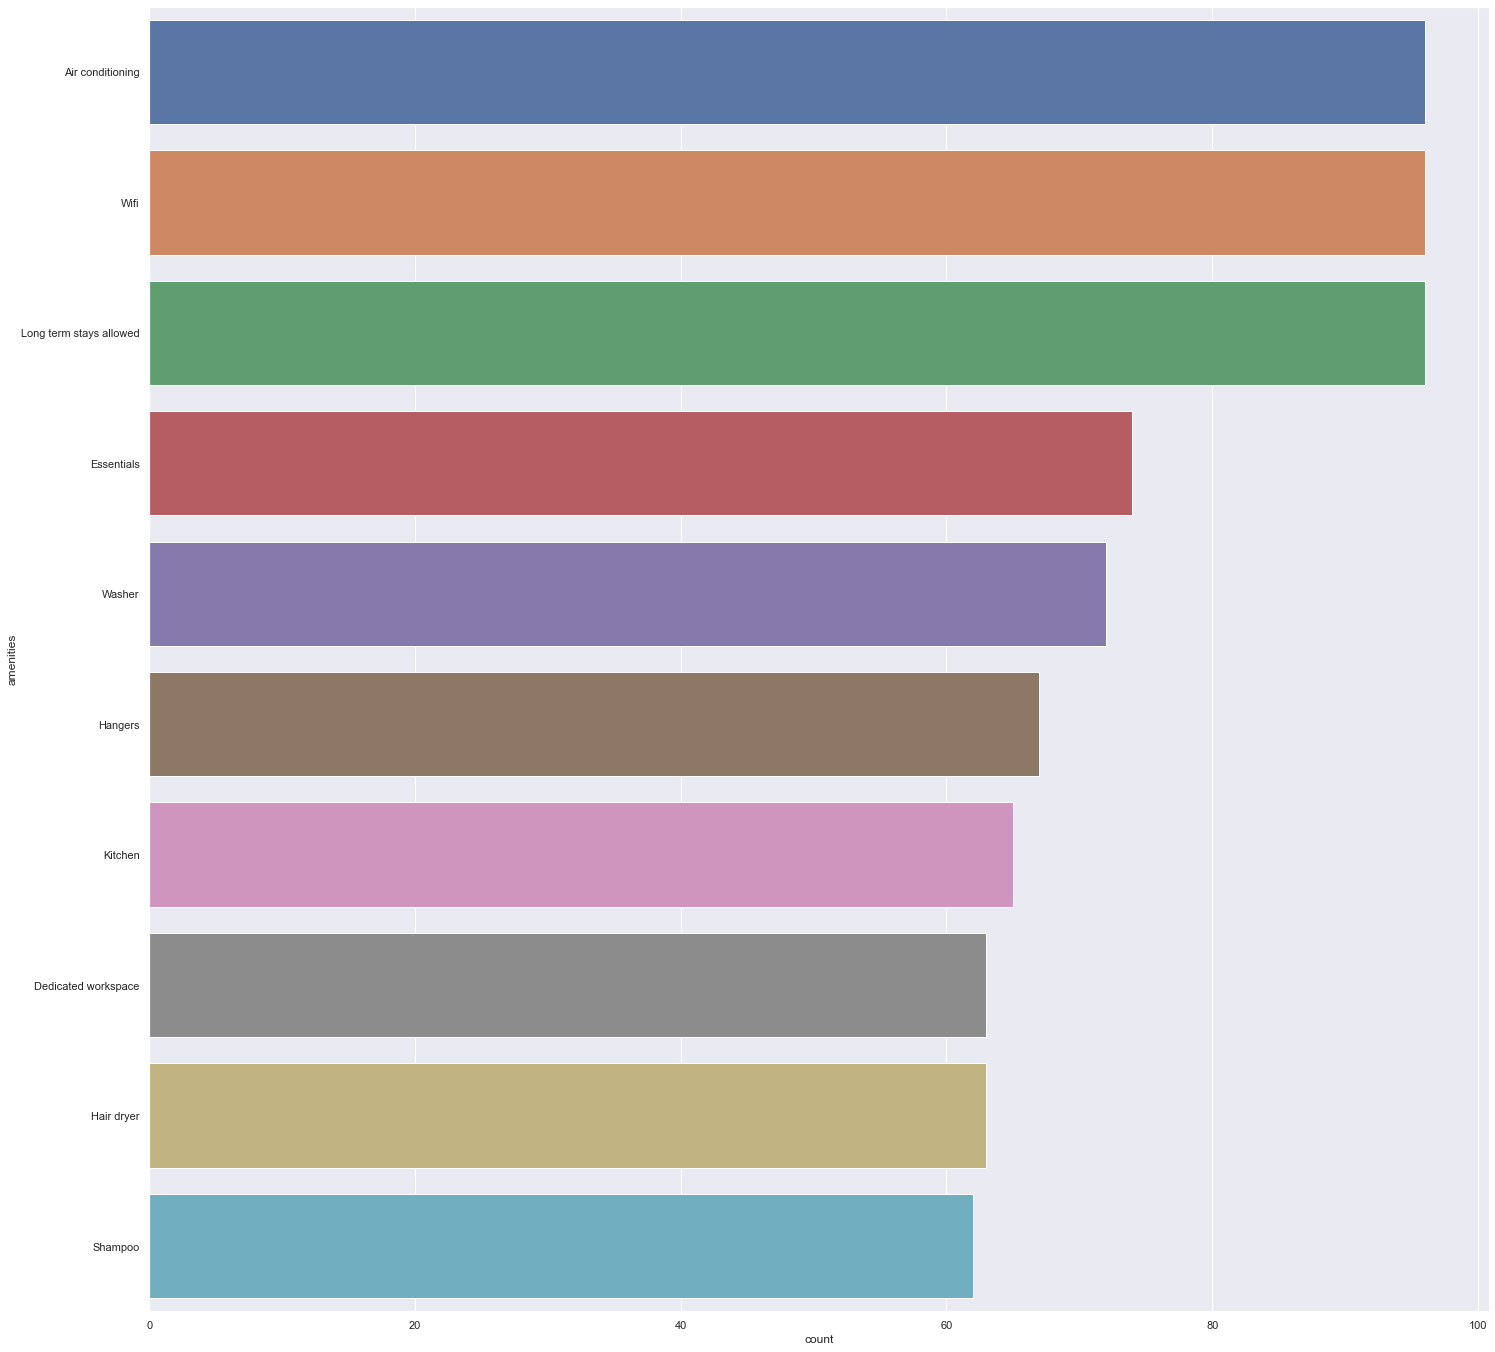

In [11]:
top_air["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
top_air["num_of_amenities"].head()
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="amenities", data=top_amenities[:10],orient = "h")

In [12]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(top_amenities)

                         amenities  count
0                 Air conditioning     96
1                             Wifi     96
2          Long term stays allowed     96
3                       Essentials     74
4                           Washer     72
5                          Hangers     67
6                          Kitchen     65
7              Dedicated workspace     63
8                       Hair dryer     63
9                          Shampoo     62
10                            Iron     60
11                              TV     59
12                        Elevator     56
13                           Dryer     44
14                       Hot water     43
15            Lock on bedroom door     42
16                            Pool     40
17                     Smoke alarm     34
18                             Gym     33
19               Fire extinguisher     30
20        Free parking on premises     29
21                    Refrigerator     28
22           Dishes and silverware

# Property Type of the top Rated places|

In [13]:
top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["property_type"] =top_air["property_type"].to_frame()
top_air["property_type"].head()
top_air["property_type"].unique()


C:\Users\junwe\AppData\Local\Temp/ipykernel_14196/894769600.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


array(['Private room in serviced apartment',
       'Private room in condominium', 'Shared room in apartment',
       'Private room in apartment', 'Private room in tent',
       'Entire house', 'Private room', 'Entire condominium',
       'Room in hotel', 'Entire serviced apartment', 'Entire apartment',
       'Private room in bungalow', 'Private room in guesthouse',
       'Room in boutique hotel', 'Room in hostel',
       'Private room in house', 'Private room in townhouse',
       'Shared room in hostel', 'Shared room in house',
       'Shared room in bed and breakfast'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='property_type'>

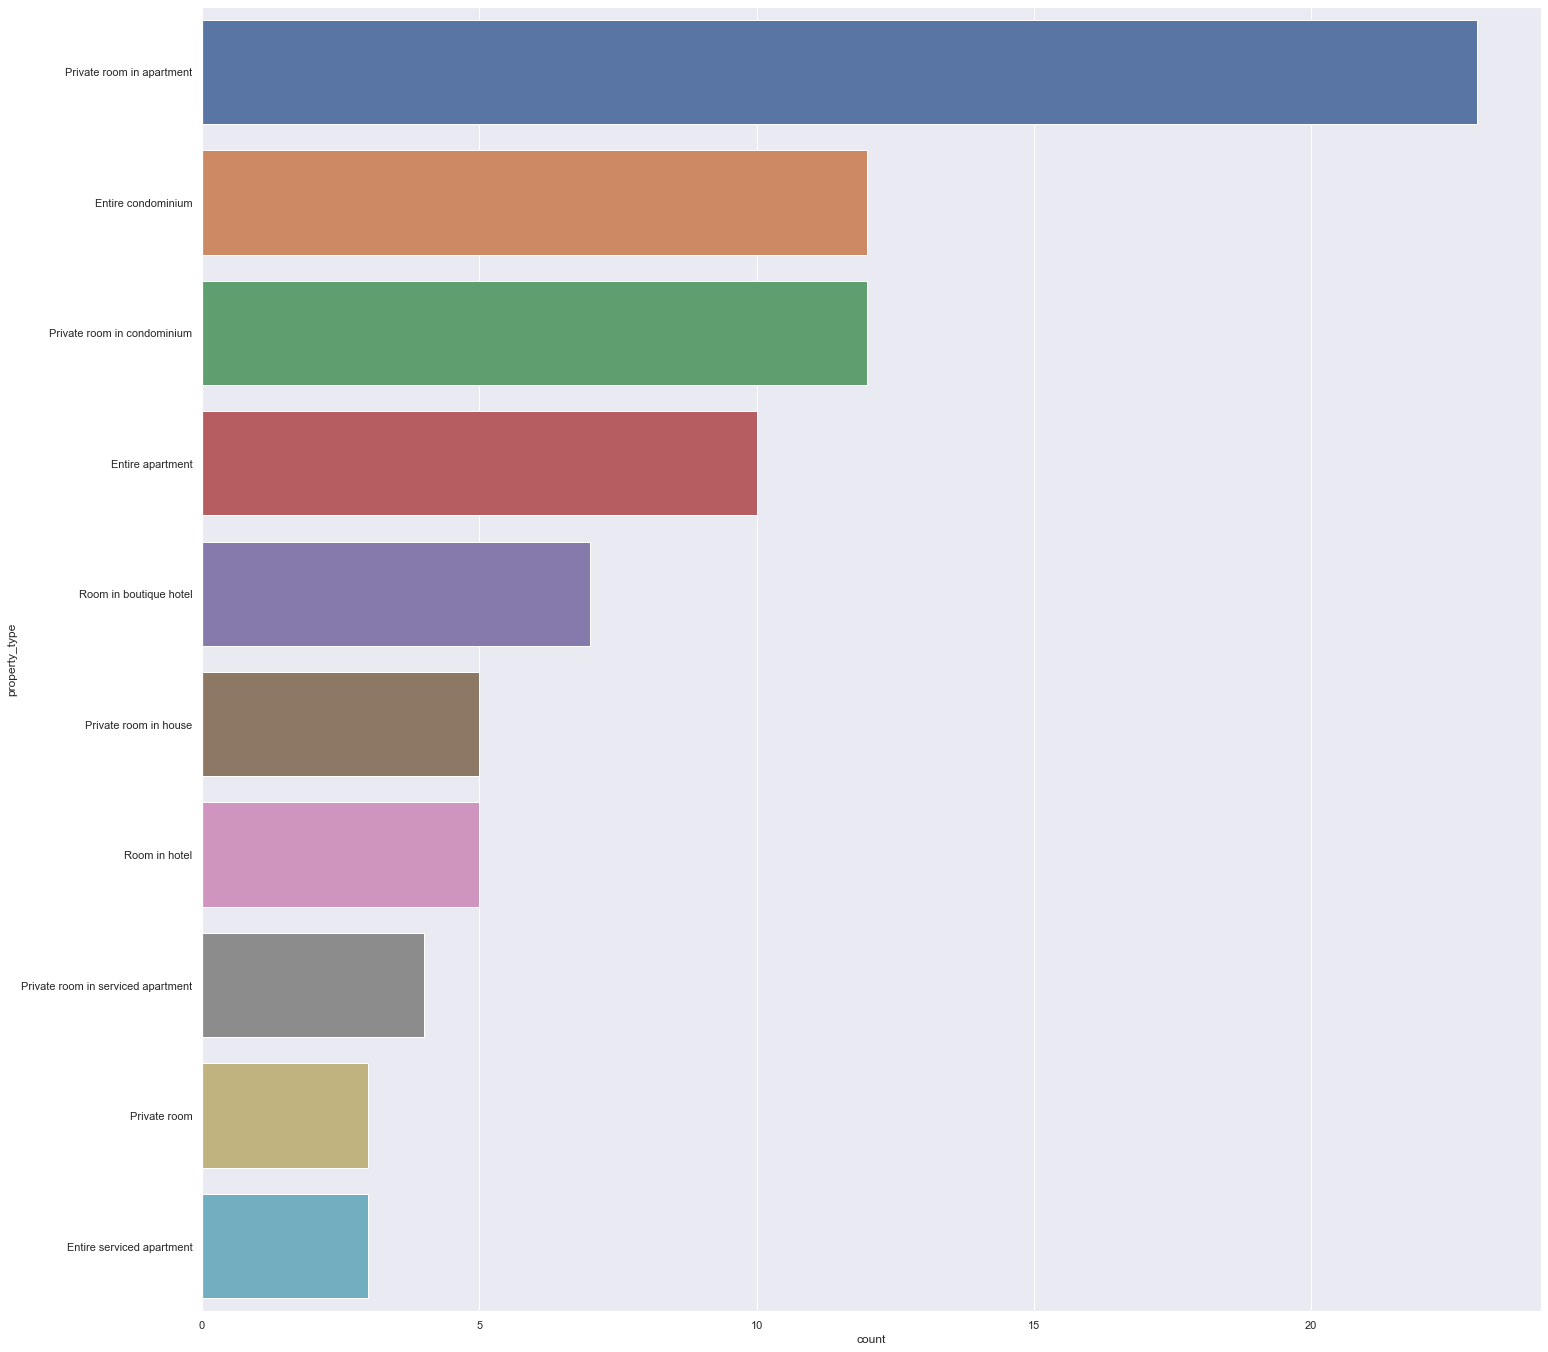

In [14]:
top_ptype = top_air['property_type'].str.split(', ', expand=True).stack().value_counts()
top_ptype = top_ptype.rename_axis('property_type').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="property_type", data=top_ptype[:10],orient = "h")

In [15]:
top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','')
top_air["neighbourhood_cleansed"] =top_air["neighbourhood_cleansed"].to_frame()
top_air["neighbourhood_cleansed"].head()

top_neig = top_air['neighbourhood_cleansed'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_neig = top_neig.rename_axis('neighbourhood_cleansed').reset_index(name='count')


C:\Users\junwe\AppData\Local\Temp/ipykernel_14196/40318175.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','')


<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

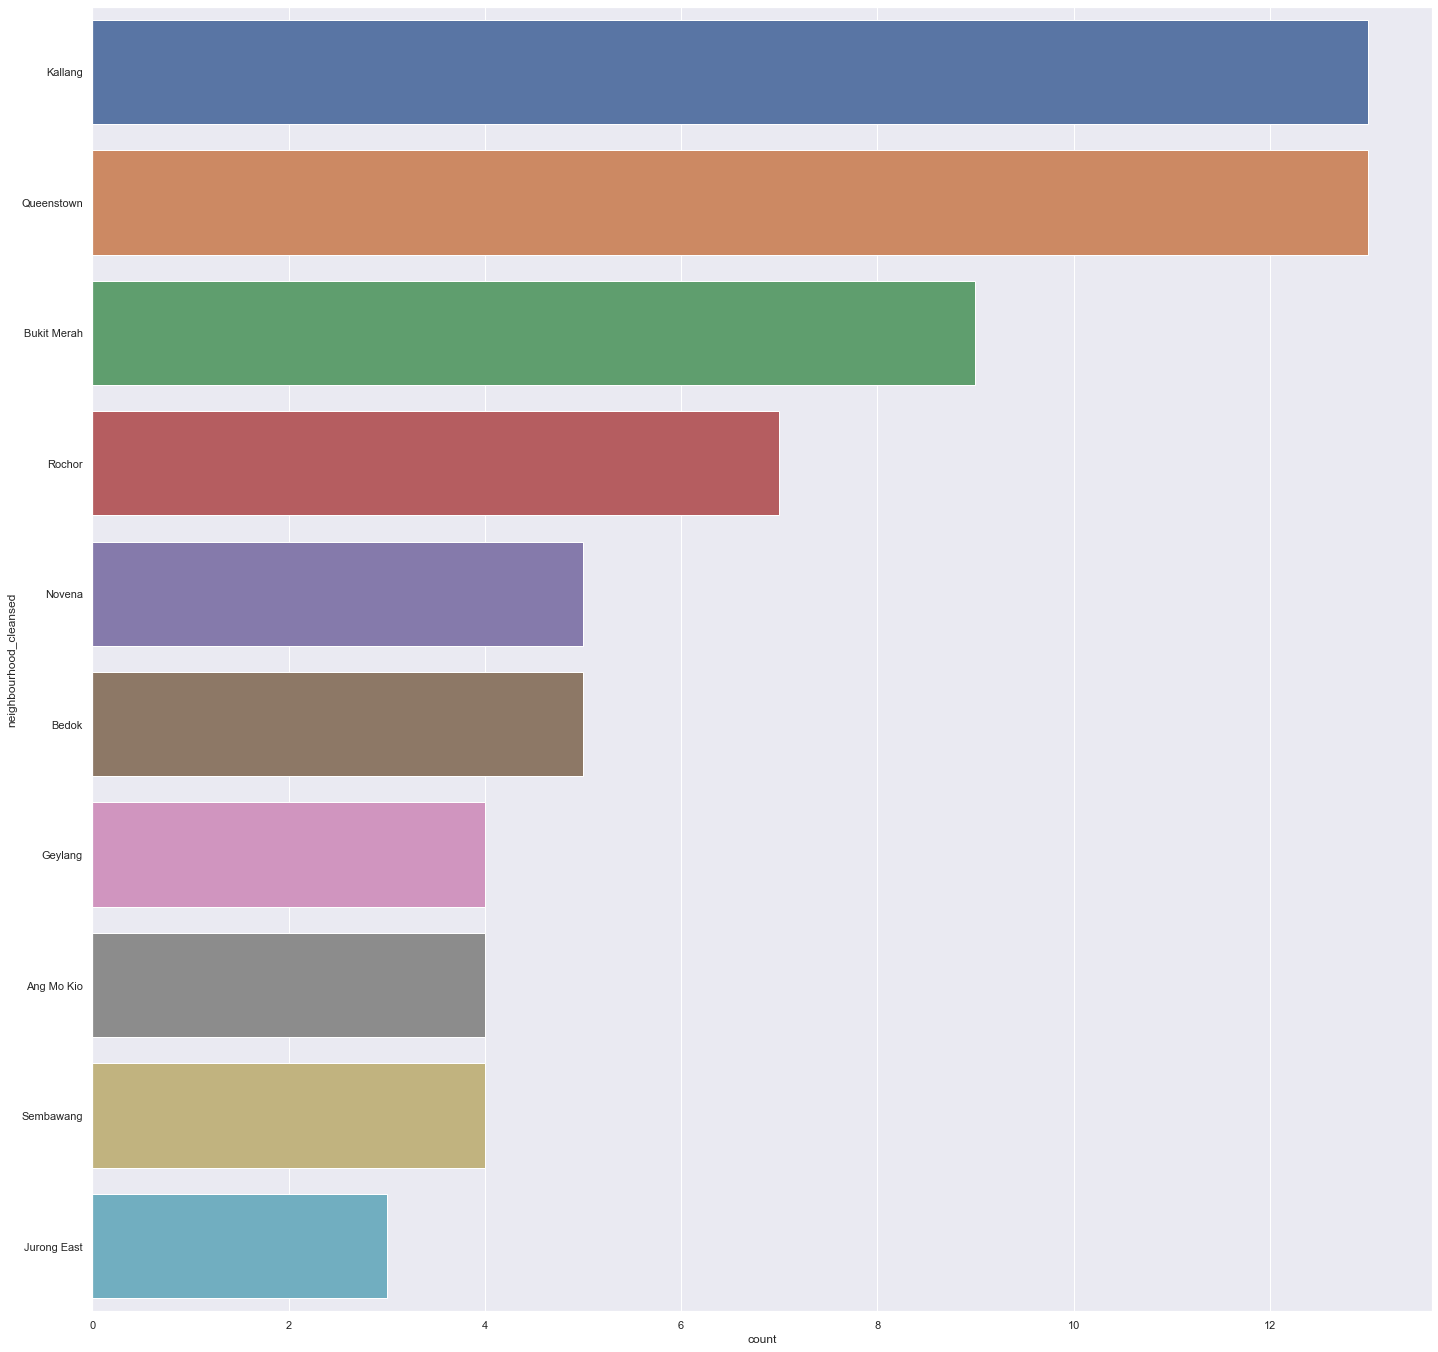

In [16]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="neighbourhood_cleansed", data=top_neig,orient = "h")

In [17]:
top_air["name"] = top_air["name"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(top_air["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()
top_words = top_words.rename_axis('top_words').reset_index(name='count')

top_words.head()

,top_words,count
0,room,37
1,in,17
2,mrt,13
3,near,13
4,br,12


In [18]:
print_full(top_words)

                                          top_words  count
0                                              room     37
1                                                in     17
2                                               mrt     13
3                                              near     13
4                                                br     12
5                                             condo     11
6                                                to     11
7                                            studio     10
8                                           private     10
9                                               for     10
10                                              bed      9
11                                           single      9
12                                             cozy      7
13                                            hotel      7
14                                             cosy      7
15                                               at     

In [19]:
#conda install -c conda-forge wordcloud

In [20]:
from wordcloud import WordCloud



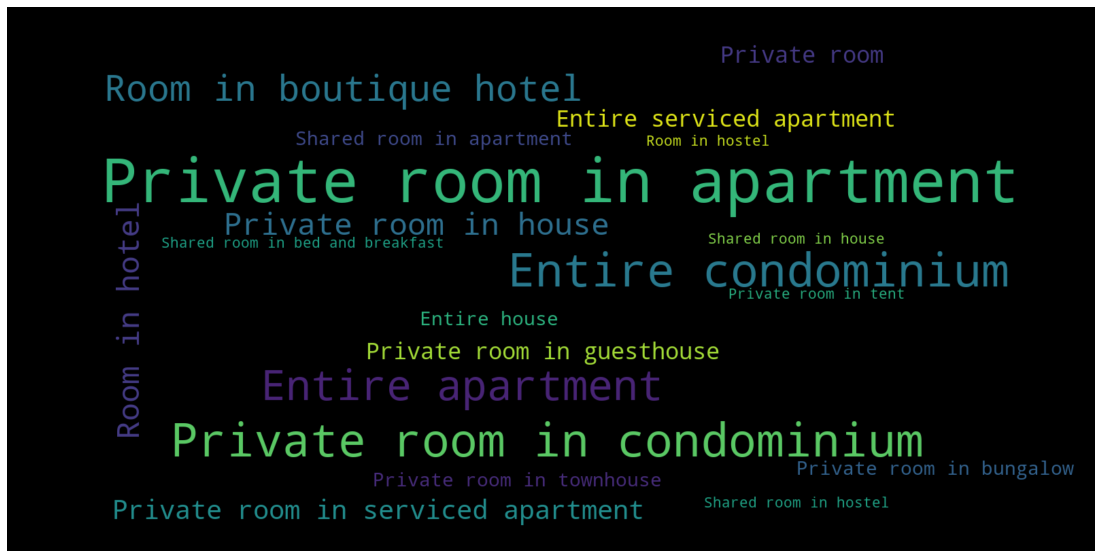

In [29]:

d = dict(zip(top_ptype['property_type'], top_ptype['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


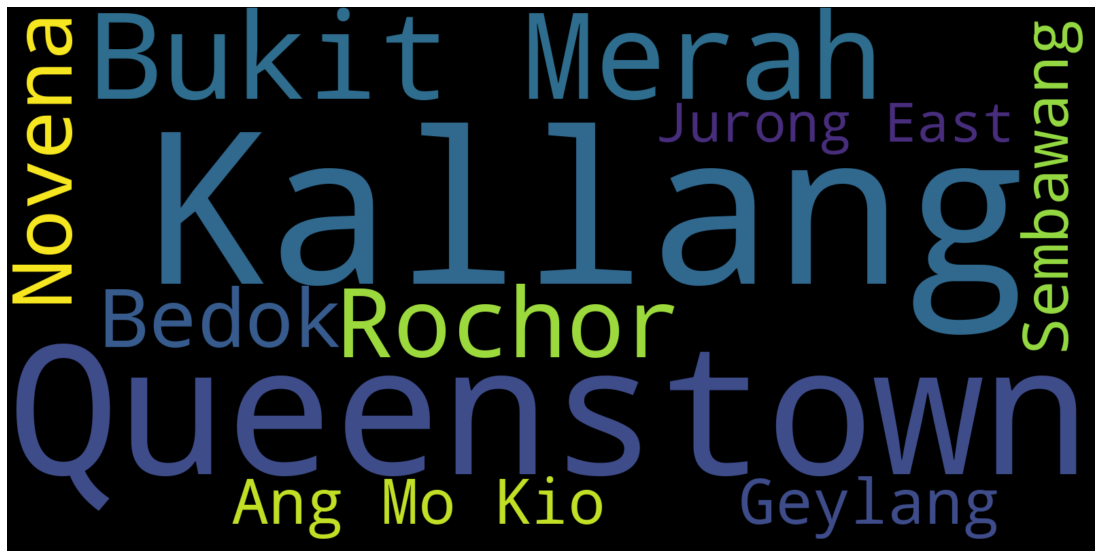

In [30]:
d = dict(zip(top_neig['neighbourhood_cleansed'], top_neig['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

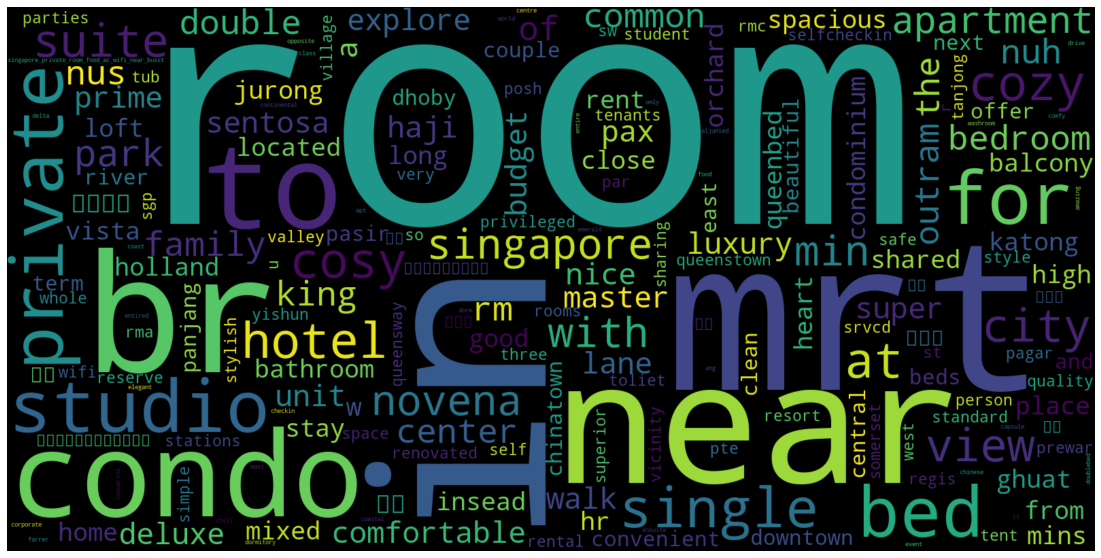

In [34]:
d = dict(zip(top_words['top_words'], top_words['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()